In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\Joyce Huang\Downloads\DBA5106 - Foundations in BA\group-assignment\tomato-2011-2020.csv')
df = df[['review_type', 'review_score', 'review_content','top_critic']].dropna()
df=df.reset_index(drop=True)
display(df)

,review_type,review_score,review_content,top_critic
0,Rotten,D+,The premise of Percy Jackson & the Olympians: ...,False
1,Fresh,A-,"Funny at times, Please Give is a surprisingly ...",False
2,Fresh,B,"Lumet keeps things tense, sweaty, suspenseful ...",False
3,Fresh,A,This movie is a masterpiece. That term gets th...,False
4,Fresh,B+,A good one that could have been better with a ...,False
...,...,...,...,...
59493,Rotten,C+,The screenplay is so muddled that it's hard to...,True
59494,Fresh,B+,"Shelton tells a typically modest story, here, ...",False
59495,Rotten,C-,"""Touchy Feely"" is light entertainment and well...",False
59496,Rotten,C,About as much fun as a dental visit.,False


In [2]:
from textblob import TextBlob
#data = TextBlob("Fun, brisk and imaginative")
#data.sentiment

In [3]:
import nltk
#nltk.download('movie_reviews')
#nltk.download('punkt')

from textblob.sentiments import NaiveBayesAnalyzer
# Applying the NaiveBayesAnalyzer
#attempt_01 = TextBlob("Fun, brisk and imaginative", analyzer=NaiveBayesAnalyzer())
# Running sentiment analysis
#analysis = attempt_01.sentiment
#print(analysis)

In [4]:
polarity_list = []
subjectivity_list = []
for row in df['review_content']:
    polarity = TextBlob(row).polarity
    polarity_list.append(polarity)
    subjectivity = TextBlob(row).subjectivity
    subjectivity_list.append(subjectivity)
    
df['polarity'] = polarity_list
df['subjectivity'] = subjectivity_list
display(df)

,review_type,review_score,review_content,top_critic,polarity,subjectivity
0,Rotten,D+,The premise of Percy Jackson & the Olympians: ...,False,0.266667,0.916667
1,Fresh,A-,"Funny at times, Please Give is a surprisingly ...",False,0.316667,0.700000
2,Fresh,B,"Lumet keeps things tense, sweaty, suspenseful ...",False,-0.083333,0.737500
3,Fresh,A,This movie is a masterpiece. That term gets th...,False,0.620667,0.636000
4,Fresh,B+,A good one that could have been better with a ...,False,0.269167,0.433333
...,...,...,...,...,...,...
59493,Rotten,C+,The screenplay is so muddled that it's hard to...,True,0.122778,0.693889
59494,Fresh,B+,"Shelton tells a typically modest story, here, ...",False,0.133333,0.625000
59495,Rotten,C-,"""Touchy Feely"" is light entertainment and well...",False,0.105556,0.733333
59496,Rotten,C,About as much fun as a dental visit.,False,0.300000,0.200000


from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer

classification_list = []
positive_list = []
negative_list = []


for row in df['review_content']:
    sent = TextBlob(row, analyzer=NaiveBayesAnalyzer()).sentiment
    classification = df.loc[row, 'classification'] = sent[0]
    positive = df.loc[row, 'p_pos'] = sent[1]
    negative = df.loc[row, 'p_neg'] = sent[2]
    classification_list.append(classification)
    positive_list.append(positive)
    negative_list.append(negative)
    
df['positive'] = positive_list
df['negative'] = negative_list
df['classification'] = classification_list
display(df)

In [5]:
score = []

for row in df['review_score']:
    if row == 'A':
        score.append(12)
    elif row == 'A-':
        score.append(11)
    elif row == 'B+':
        score.append(10)
    elif row == 'B':
        score.append(9)
    elif row == 'B-':
        score.append(8)
    elif row == 'C+':
        score.append(7)
    elif row == 'C':
        score.append(6)
    elif row == 'C-':
        score.append(5)
    elif row == 'D+':
        score.append(4)
    elif row == 'D':
        score.append(3)
    elif row == 'D-':
        score.append(2)
    elif row == 'F':
        score.append(1)    
    else:
        score.append(0)

df['score'] = score
display(df.head())

,review_type,review_score,review_content,top_critic,polarity,subjectivity,score
0,Rotten,D+,The premise of Percy Jackson & the Olympians: ...,False,0.266667,0.916667,4
1,Fresh,A-,"Funny at times, Please Give is a surprisingly ...",False,0.316667,0.700000,11
2,Fresh,B,"Lumet keeps things tense, sweaty, suspenseful ...",False,-0.083333,0.737500,9
3,Fresh,A,This movie is a masterpiece. That term gets th...,False,0.620667,0.636000,12
4,Fresh,B+,A good one that could have been better with a ...,False,0.269167,0.433333,10


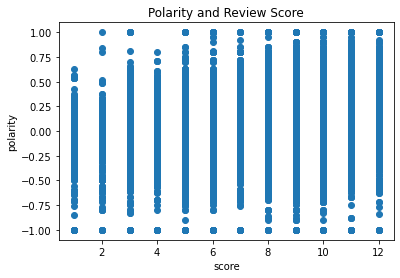

[]


In [6]:
plt.title('Polarity and Review Score')
#plt.figure(figsize=(15,10))
plt.scatter(df['score'], df['subjectivity']*df['polarity'])
plt.xlabel('score')
plt.ylabel('polarity')
plt.show()

#expected = df['subjectivity']*df['polarity']
#df['expected'] = expected

A = []
A_minus =[]
B = []
B_plus = []
B_minus =[]
C = []
C_plus = []
C_minus =[]
D = []
D_plus = []
D_minus =[]
F = []

for i in df['score']:
    if i == '12':
        A.append(df['expected'].iloc[i])
    elif i == '11':
        A_minus.append(df['expected'].iloc[i])

print(A_minus)

    
#mean_sentimental = df['expected'].groupby('score').mean()
#category = ['1','2','3','4','5','6','7','8','9','10','11','12']

#plt.title('Polarity and Review Score')
#plt.figure(figsize=(15,10))
#plt.plot(category, mean_sentimental)
#plt.xlabel('score')
#plt.ylabel('polarity')
#plt.show()


In [7]:
df.groupby('score')['polarity'].mean()
#df.groupby('score')['subjectivity'].mean()

score
1    -0.097756
2    -0.066134
3    -0.019708
4     0.010444
5     0.033566
6     0.060960
7     0.084925
8     0.147146
9     0.174029
10    0.181877
11    0.205411
12    0.231963
Name: polarity, dtype: float64

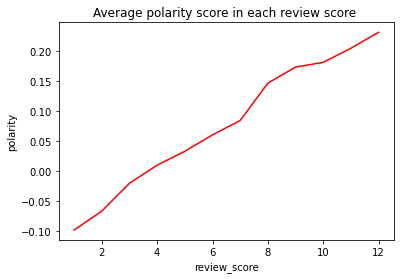

In [13]:
score = [1,2,3,4,5,6,7,8,9,10,11,12]
polarity = [-0.097756, -0.066134, -0.019708, 0.010444, 0.033566, 0.060960, 0.084925, 0.147146, 0.174029, 0.181877, 0.205411, 0.231963]

plt.title('Average polarity score in each review score ')
plt.plot(score, polarity, color = 'red')
plt.xlabel('review_score')
plt.ylabel('polarity')
plt.show()

In [9]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


#df = pd.get_dummies(df, columns=['top_critic'])
df['sentiment'] = np.where(df['review_type'] == 'Fresh', 1, 0)
df['top_critic_dummy'] = np.where(df['top_critic'] == 'True', 1, 0)
display(df)

x = df['polarity'].values.reshape(-1,1)
y = df['score'].values

lr = LinearRegression(fit_intercept = True)
lr.fit(x,y)
y_pred = lr.predict(x)

print('Coefficients = ', lr.coef_)
print('Intercept = ', lr.intercept_)


,review_type,review_score,review_content,top_critic,polarity,subjectivity,score,sentiment,top_critic_dummy
0,Rotten,D+,The premise of Percy Jackson & the Olympians: ...,False,0.266667,0.916667,4,0,0
1,Fresh,A-,"Funny at times, Please Give is a surprisingly ...",False,0.316667,0.700000,11,1,0
2,Fresh,B,"Lumet keeps things tense, sweaty, suspenseful ...",False,-0.083333,0.737500,9,1,0
3,Fresh,A,This movie is a masterpiece. That term gets th...,False,0.620667,0.636000,12,1,0
4,Fresh,B+,A good one that could have been better with a ...,False,0.269167,0.433333,10,1,0
...,...,...,...,...,...,...,...,...,...
59493,Rotten,C+,The screenplay is so muddled that it's hard to...,True,0.122778,0.693889,7,0,0
59494,Fresh,B+,"Shelton tells a typically modest story, here, ...",False,0.133333,0.625000,10,1,0
59495,Rotten,C-,"""Touchy Feely"" is light entertainment and well...",False,0.105556,0.733333,5,0,0
59496,Rotten,C,About as much fun as a dental visit.,False,0.300000,0.200000,6,0,0


Coefficients =  [2.49391125]
Intercept =  7.80852350477321


In [10]:
from statsmodels.formula.api import ols
import scipy

model= ols('score ~ polarity + sentiment', df).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.711      
Dependent Variable: score            AIC:                205110.7243
Date:               2021-11-19 23:39 BIC:                205137.7054
No. Observations:   59498            Log-Likelihood:     -1.0255e+05
Df Model:           2                F-statistic:        7.304e+04  
Df Residuals:       59495            Prob (F-statistic): 0.00       
R-squared:          0.711            Scale:              1.8394     
----------------------------------------------------------------------
               Coef.    Std.Err.      t       P>|t|    [0.025   0.975]
----------------------------------------------------------------------
Intercept      5.2005     0.0095   548.0811   0.0000   5.1819   5.2191
polarity       0.6179     0.0209    29.5867   0.0000   0.5769   0.6588
sentiment      4.3657     0.0121   361.7657   0.0000   4.3421   4.3894
--------------------------------------------------------------------
Omnibus:               749.430       Durbin-Watson:          1.617  
Prob(Omnibus):         0.000         Jarque-Bera (JB):       740.835
Skew:                  -0.252        Prob(JB):               0.000  
Kurtosis:              2.790         Condition No.:          5      
====================================================================

"""

In [11]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split


x = df['polarity'].values.reshape(-1, 1)
y = df['score'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40)

lr = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
lr.fit(x_train, y_train)

y_pred_test = lr.predict(x_test)
print('Out of sample model performance of Logistic = {}'.format(round(accuracy_score(y_test, y_pred_test),4)),'\n')

print(np.round(lr.coef_, 6))
print(np.round(lr.intercept_,8))

Out of sample model performance of Logistic = 0.2028 

[[-2.316622]
 [-2.00871 ]
 [-1.460309]
 [-1.027786]
 [-0.681056]
 [-0.318997]
 [ 0.004637]
 [ 0.996147]
 [ 1.42187 ]
 [ 1.502549]
 [ 1.807407]
 [ 2.080869]]
[-1.65668938 -1.75700982 -0.22126822 -0.64140059  0.30557444  0.64876892
  0.36601969  0.69963822  1.10992897  0.89655258  0.28550963 -0.03562442]
